train data after proccess :      User ID  Age  AnnualSalary  Gender_Male
29       994   38        147500        False
535      833   59         24500        False
695       79   35         91000         True
557       38   43         76500        False
836      732   31        118000        False
..       ...  ...           ...          ...
106      398   36         56500         True
270       35   42         53000        False
860      626   37         33000        False
435      931   43        112000        False
102      126   26         80000         True

[800 rows x 4 columns]


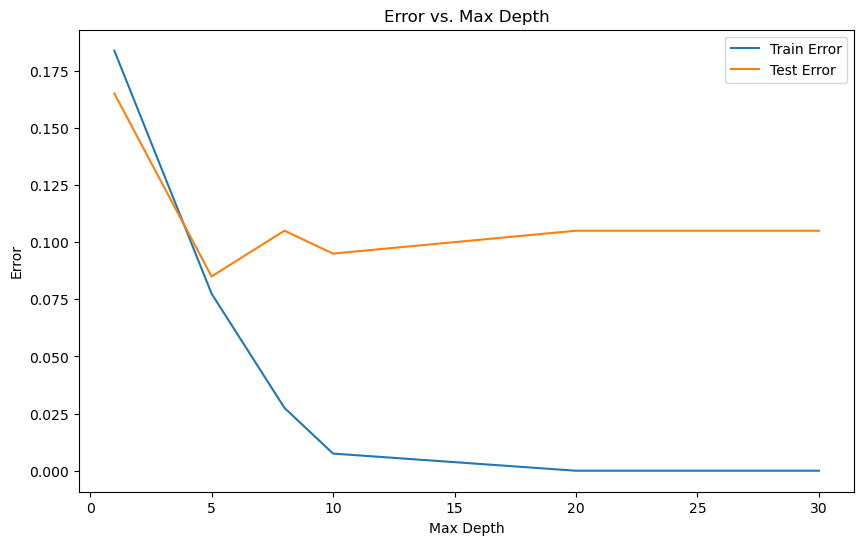

In [2]:
import pandas as pd
import io
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('car_data.csv')  
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
X = data.drop(columns='Purchased')
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train data after proccess :",X_train)




train_errors = []
test_errors = []



max_depths = [None,1,5,8, 10, 20, 30]


for max_depth in max_depths:
        
    
        
        
        model = DecisionTreeClassifier(max_depth=max_depth)
        
        
        model.fit(X_train, y_train)
        
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
        out = io.StringIO()


plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Train Error')
plt.plot(max_depths, test_errors, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.show()


In [3]:
# Calculate the threshold using the mean and median of "Age"
mean_threshold = data['Age'].mean()
median_threshold = data['Age'].median()

# Create a new column to store the binary labels
data['Age_Mean'] = data['Age'].apply(lambda x: 1 if x >= mean_threshold else 0)
data['Age_Median'] = data['Age'].apply(lambda x: 1 if x >= median_threshold else 0)

# Split the data into features (X) and the target variable (y)
X_mean = data[['Gender_Male', 'Age_Mean', 'AnnualSalary']]
X_median = data[['Gender_Male', 'Age_Median', 'AnnualSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train_mean, X_test_mean, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)
X_train_median, X_test_median, y_train, y_test = train_test_split(X_median, y, test_size=0.2, random_state=42)

# Create and train decision tree classifiers for both cases
clf_mean = DecisionTreeClassifier(max_depth=5)
clf_median = DecisionTreeClassifier(max_depth=5)

clf_mean.fit(X_train_mean, y_train)
clf_median.fit(X_train_median, y_train)

# Make predictions on the test data for both cases
y_pred_mean = clf_mean.predict(X_test_mean)
y_pred_median = clf_median.predict(X_test_median)

# Evaluate the models' performance
accuracy_mean = accuracy_score(y_test, y_pred_mean)
accuracy_median = accuracy_score(y_test, y_pred_median)

print("Accuracy (Mean Threshold):", accuracy_mean)
print("Accuracy (Median Threshold):", accuracy_median)


Accuracy (Mean Threshold): 0.84
Accuracy (Median Threshold): 0.84


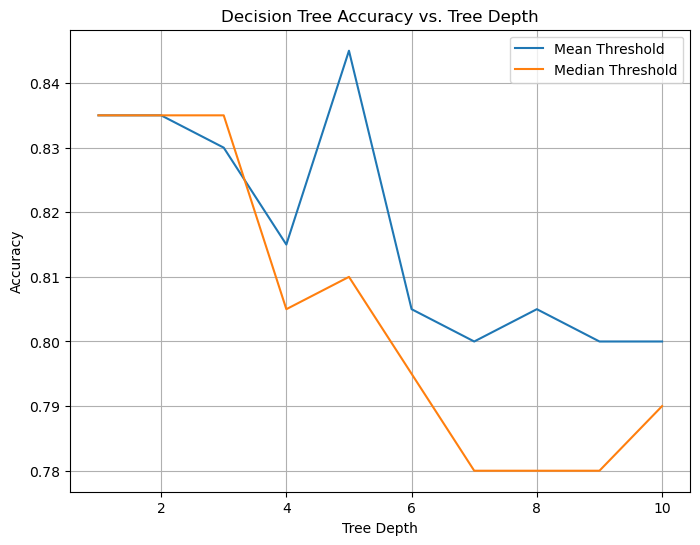

Accuracy (Mean Threshold): 0.8
Accuracy (Median Threshold): 0.79


In [5]:
# Calculate the threshold using the mean and median of "AnnualSalary"
mean_threshold = data['AnnualSalary'].mean()
median_threshold = data['AnnualSalary'].median()

# Create a new column to store the binary labels
data['AnnualSalary_Mean'] = data['AnnualSalary'].apply(lambda x: 1 if x >= mean_threshold else 0)
data['AnnualSalary_Median'] = data['AnnualSalary'].apply(lambda x: 1 if x >= median_threshold else 0)

# Split the data into features (X) and the target variable (y)
X_mean = data[['Gender_Male', 'Age', 'AnnualSalary_Mean']]
X_median = data[['Gender_Male', 'Age', 'AnnualSalary_Median']]
y = data['Purchased']

# Split the data into training and testing sets
X_train_mean, X_test_mean, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)
X_train_median, X_test_median, y_train, y_test = train_test_split(X_median, y, test_size=0.2, random_state=42)


# Define a range of depths to test
depths = range(1, 11)  # You can adjust the range as needed

# Initialize lists to store accuracy scores for mean and median thresholds
accuracy_mean_scores = []
accuracy_median_scores = []

for depth in depths:
    # Create and train decision tree classifiers for both cases
    clf_mean = DecisionTreeClassifier(max_depth=depth)
    clf_median = DecisionTreeClassifier(max_depth=depth)

    clf_mean.fit(X_train_mean, y_train)
    clf_median.fit(X_train_median, y_train)

    # Make predictions on the test data for both cases
    y_pred_mean = clf_mean.predict(X_test_mean)
    y_pred_median = clf_median.predict(X_test_median)

    # Calculate accuracy scores
    accuracy_mean = accuracy_score(y_test, y_pred_mean)
    accuracy_median = accuracy_score(y_test, y_pred_median)

    # Append the scores to the lists
    accuracy_mean_scores.append(accuracy_mean)
    accuracy_median_scores.append(accuracy_median)

# Create a plot to visualize the accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracy_mean_scores, label='Mean Threshold')
plt.plot(depths, accuracy_median_scores, label='Median Threshold')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


print("Accuracy (Mean Threshold):", accuracy_mean)
print("Accuracy (Median Threshold):", accuracy_median)
